In [94]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/small-practice-weather-dataset/weather_dataset.csv


In [5]:
df = pd.read_csv("/kaggle/input/small-practice-weather-dataset/weather_dataset.csv")

In [6]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [8]:
df.shape

(8784, 8)

### Questions to process:
Q. 1)  Find all the unique 'Wind Speed' values in the data.[X]</br>
Q. 2) Find the number of times when the 'Weather is exactly Clear'.[X]</br>
Q. 3) Find the number of times when the 'Wind Speed was exactly 4 km/h'.[X]</br>
Q. 4) Find out all the Null Values in the data.[X]</br>
Q. 5) Rename the column name 'Weather' of the dataframe to 'Weather Condition'.[X]</br>
Q. 6) What is the mean 'Visibility' ?[X]</br>
Q. 7) What is the Standard Deviation of 'Pressure'  in this data?[X]</br>
Q. 8) What is the Variance of 'Relative Humidity' in this data ?[X]</br>
Q. 9) Find all instances when 'Snow' was recorded.[X]</br>
Q. 10) Find all instances when 'Wind Speed is above 24' and 'Visibility is 25'.[X]</br>
Q. 11) What is the Mean value of each column against each 'Weather Condition ?[X]</br>
Q. 12) What is the Minimum & Maximum value of each column against each 'Weather Condition ?[X]</br>
Q. 13) Find all instances when 'Weather is Clear' or 'Visibility is above 40'.[X]</br>
Q. 14) Find all instances when :</br>
A. 'Weather is Clear' and 'Relative Humidity is greater than 50'</br>
or</br>
B. 'Visibility is above 40'[X]</br>
Q. 15) Find the highest and lowest mean value of all the columns for each month. [X]</br>
Q. 16) Find the most common weather pattern in a month. [X]</br>
Q. 17) Find the most common weather pattern of the entire year. [X]</br>

In [11]:
df.head(1)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog


qn 1

In [12]:
df['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2])

qn 2

In [15]:
df[df.Weather == 'Clear'].count().values[0]

1326

qn 3

In [16]:
df[df['Wind Speed_km/h'] == 4].count().values[0]

474

qn 4

In [17]:
df.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

qn 5

In [19]:
df.rename(columns={'Weather':'Weather Condition'},inplace=True)

qn 6

In [21]:
df.Visibility_km.mean()

27.664446721311478

qn 7

In [22]:
df.Press_kPa.std()

0.8440047459486483

qn 8

In [23]:
df['Rel Hum_%'].var()

286.24855019850196

qn 9

In [38]:
df[df['Weather Condition'].str.contains('Snow')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
41,1/2/2012 17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,1/2/2012 20:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,1/2/2012 21:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,1/2/2012 23:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,1/3/2012 0:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


qn 10

In [25]:
df[(df['Wind Speed_km/h'] > 24) & (df['Visibility_km'] == 25)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,12/28/2012 17:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,12/30/2012 17:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


qn 11

In [29]:
df.drop(columns=['Date/Time']).groupby('Weather Condition').mean()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


qn 12

In [30]:
df.drop(columns=['Date/Time']).groupby('Weather Condition').max()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,32.8,20.4,99,33,48.3,103.63
Cloudy,30.5,22.6,99,54,48.3,103.65
Drizzle,18.8,17.7,96,30,25.0,101.56
"Drizzle,Fog",19.9,19.1,100,28,9.7,102.07
"Drizzle,Ice Pellets,Fog",0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",1.2,0.2,95,19,11.3,101.15
"Drizzle,Snow,Fog",1.1,0.6,98,32,9.7,100.15
Fog,20.8,19.6,100,22,9.7,103.04
Freezing Drizzle,-2.3,-3.3,93,26,12.9,101.02


In [31]:
df.drop(columns=['Date/Time']).groupby('Weather Condition').min()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,-23.3,-28.5,20,0,11.3,99.52
Cloudy,-21.4,-26.8,18,0,11.3,98.39
Drizzle,1.1,-0.2,74,0,6.4,97.84
"Drizzle,Fog",0.0,-1.6,85,0,1.0,98.65
"Drizzle,Ice Pellets,Fog",0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",0.9,0.1,92,9,9.7,100.63
"Drizzle,Snow,Fog",0.3,-0.1,92,7,2.4,97.79
Fog,-16.0,-17.2,80,0,0.2,98.31
Freezing Drizzle,-9.0,-12.2,78,6,4.8,98.44


qn 13

In [32]:
df[(df['Weather Condition'] == 'Clear') | (df['Visibility_km'] > 40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear


qn 14

In [34]:
df[((df['Weather Condition'] == 'Clear') & (df['Rel Hum_%'] > 50)) | (df['Visibility_km'] > 40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
110,1/5/2012 14:00,-5.1,-10.7,65,22,48.3,100.46,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear


<Axes: xlabel='Weather Condition'>

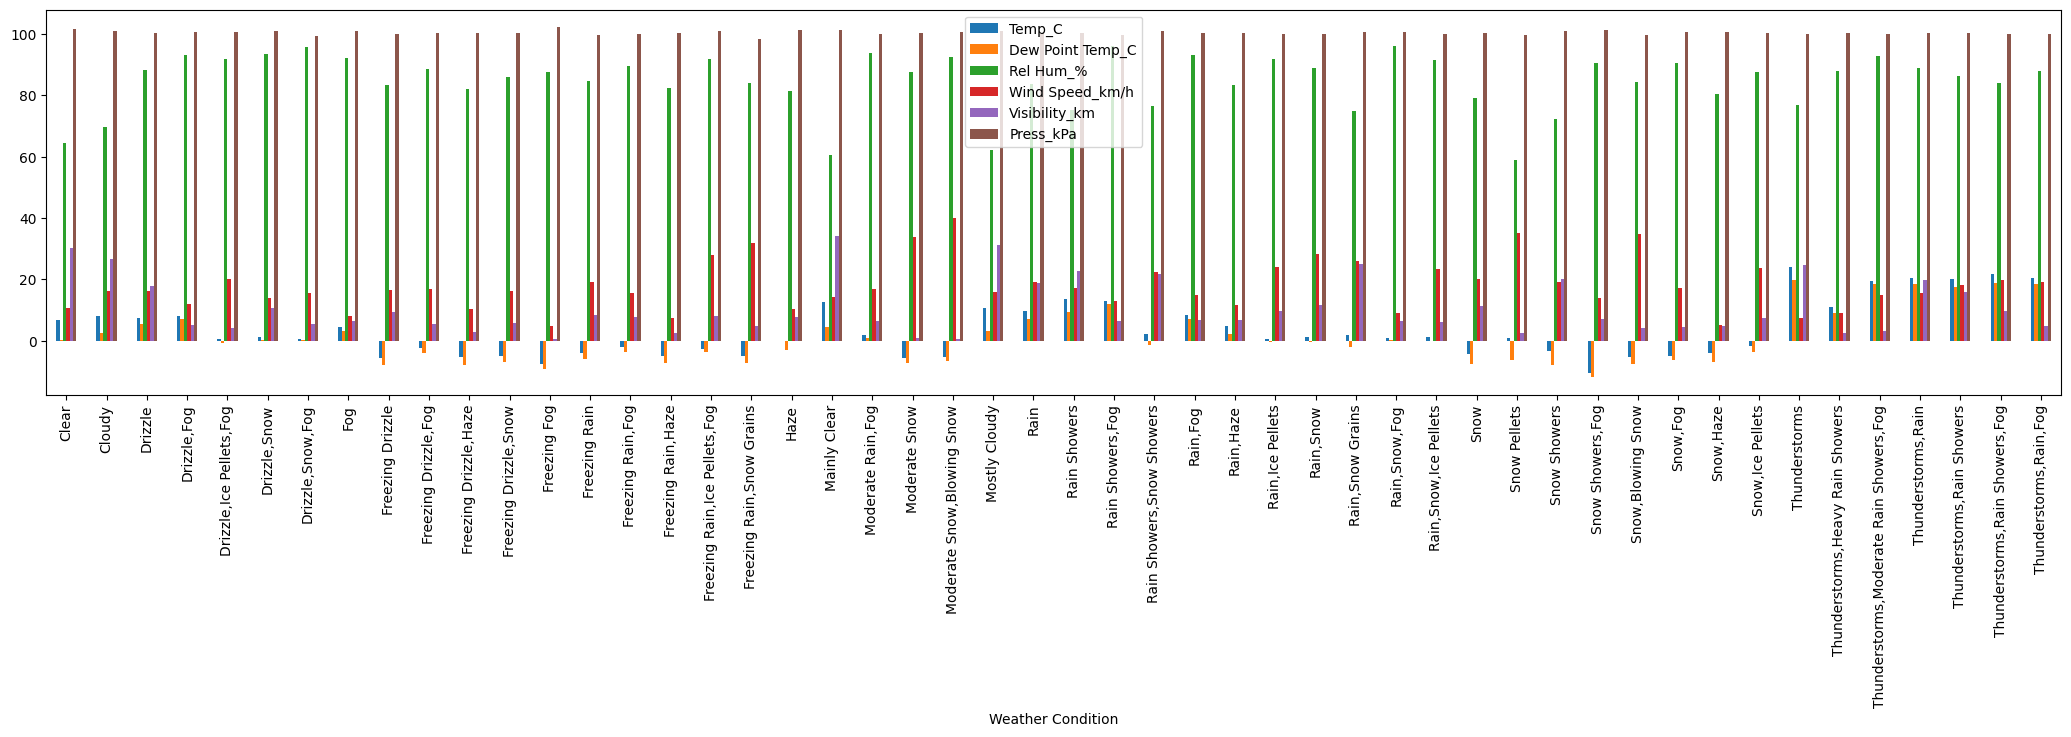

In [45]:
df.drop(columns=['Date/Time']).groupby('Weather Condition').mean().plot.bar(figsize=(26,5))

qn 15

In [46]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M')

In [50]:
def month_number_to_name(month_number):
    return pd.to_datetime(f'2024-{month_number:02d}-01').strftime('%B')

In [52]:
df['Month'] = df['Date/Time'].dt.month.apply(month_number_to_name)

<Axes: xlabel='Month'>

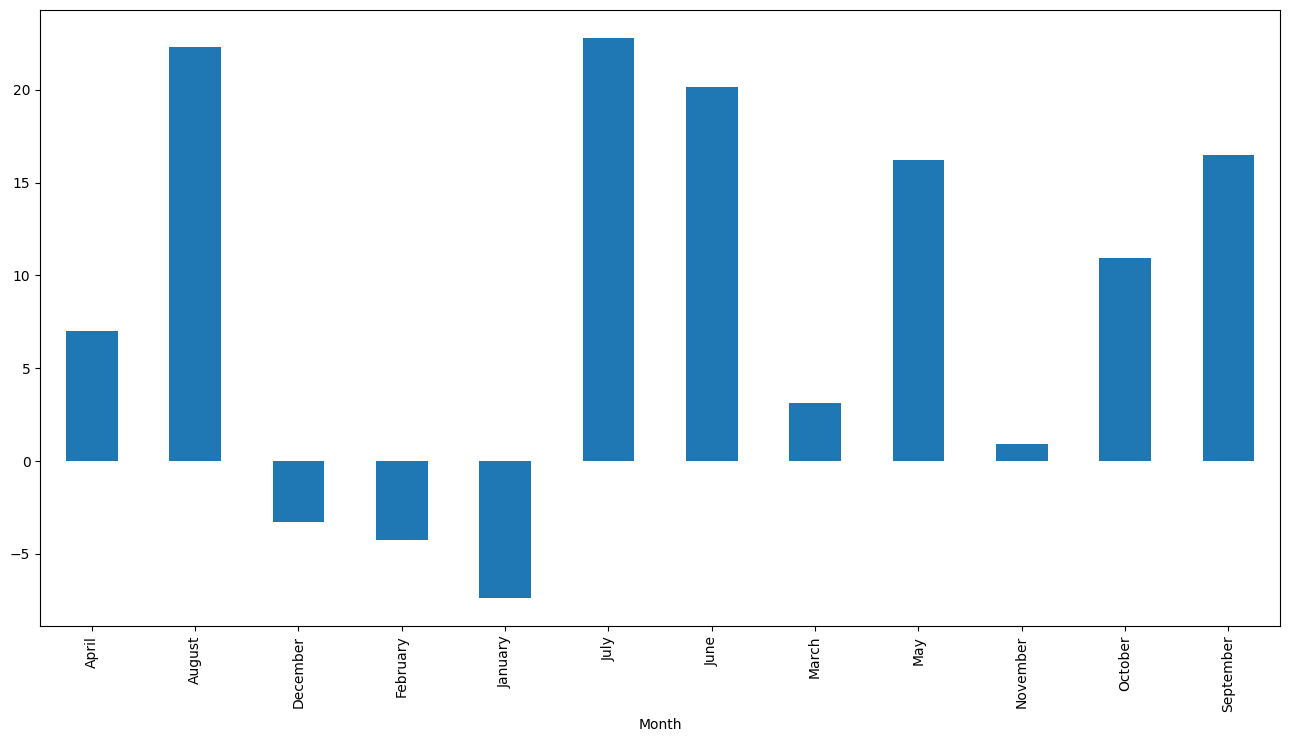

In [62]:
df.groupby('Month').Temp_C.mean().plot.bar(figsize=(16,8))

### Insight: Highest mean temperature(in deg C) in month of July and lowest in month of January

<Axes: xlabel='Month'>

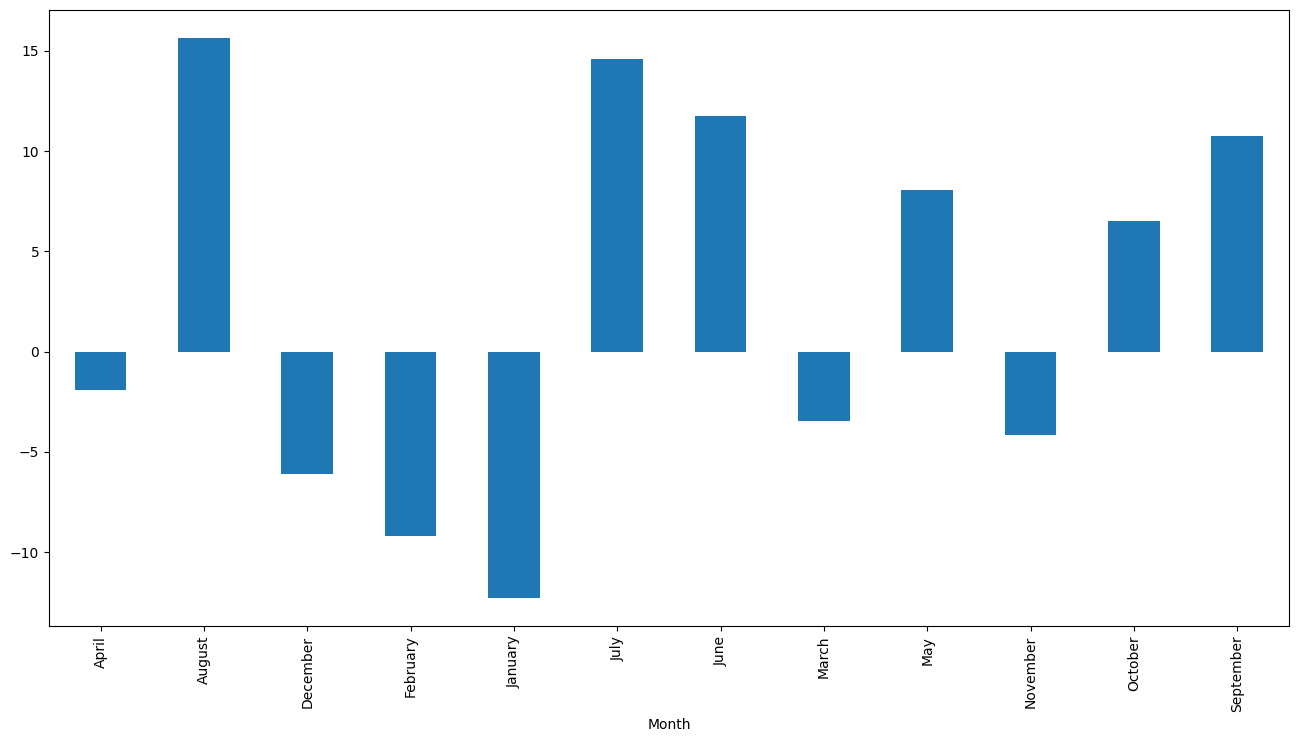

In [65]:
df.groupby('Month')['Dew Point Temp_C'].mean().plot.bar(figsize=(16,8))

### Insight: Mean Dew Point Temp (in C) highest for August and lowest for January

<Axes: xlabel='Month'>

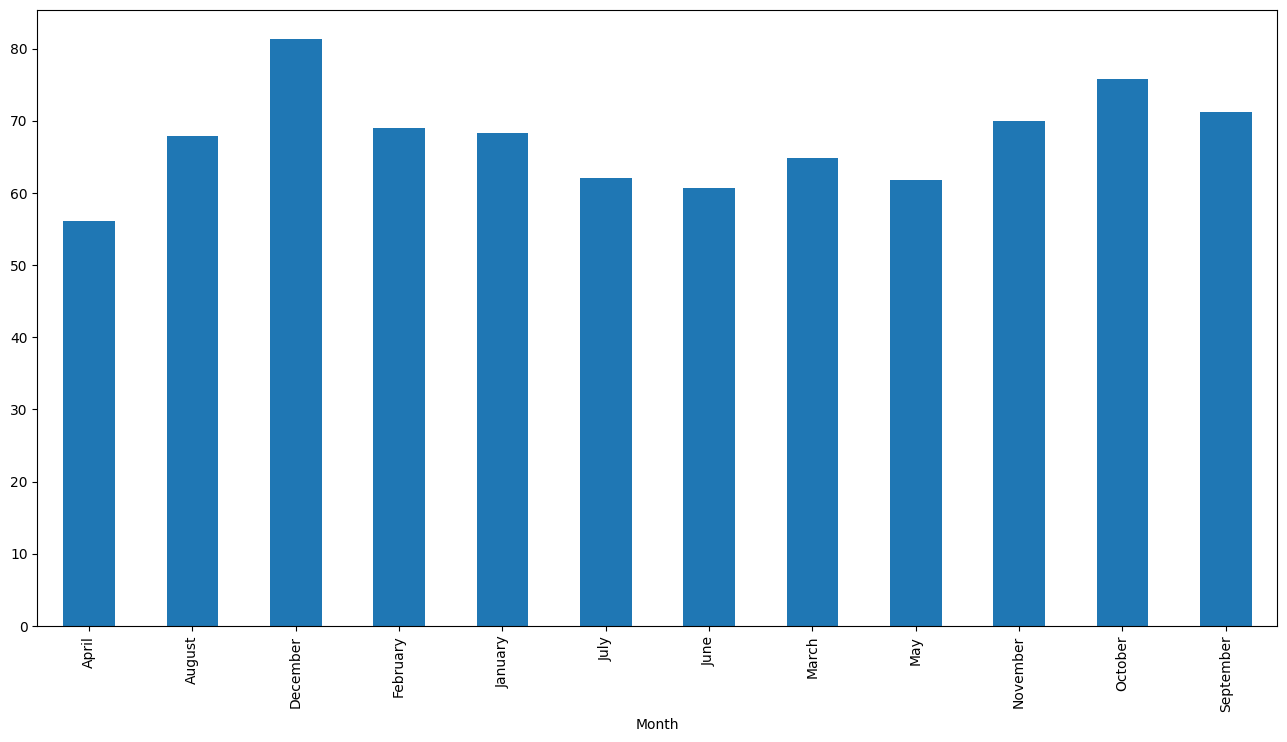

In [66]:
df.groupby('Month')['Rel Hum_%'].mean().plot.bar(figsize=(16,8))

### Insight: Mean Rel Humidity(%) highest in December and lowest in April

<Axes: xlabel='Month'>

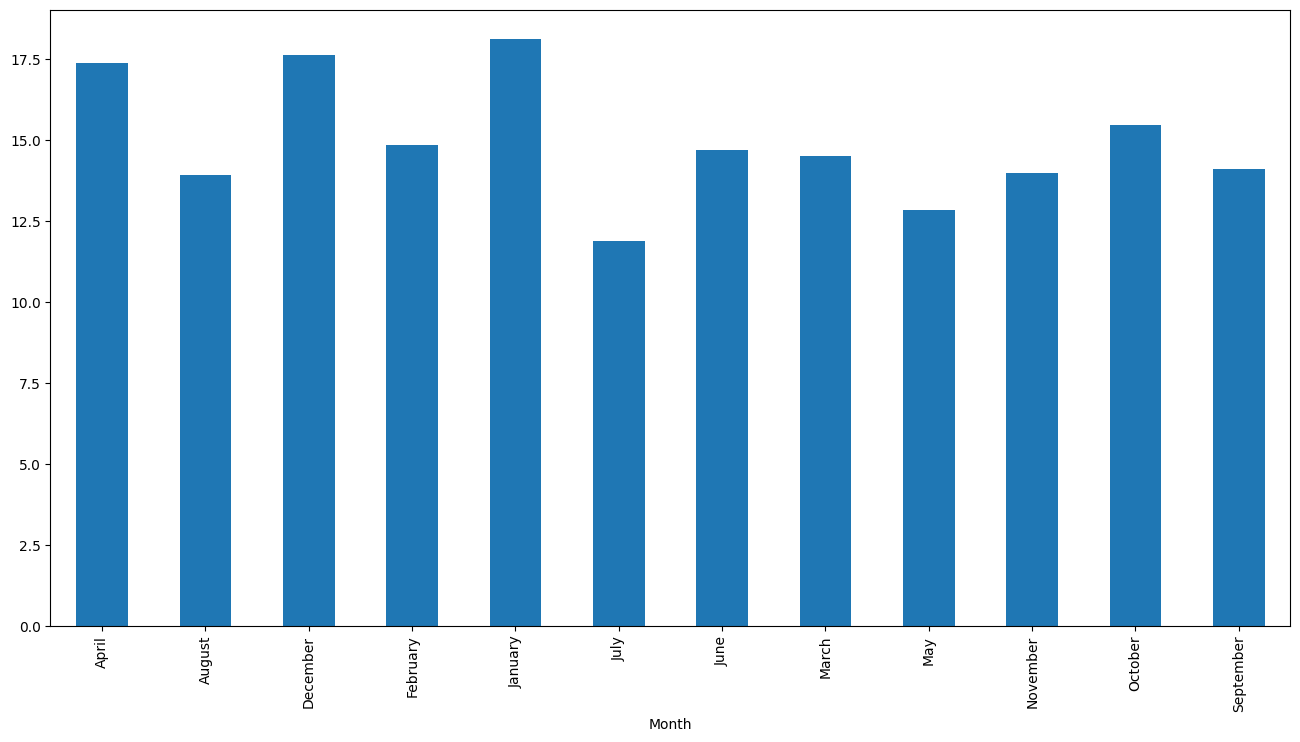

In [67]:
df.groupby('Month')['Wind Speed_km/h'].mean().plot.bar(figsize=(16,8))

### Insights : Mean Wind speed highest in January lowest in July

<Axes: xlabel='Month'>

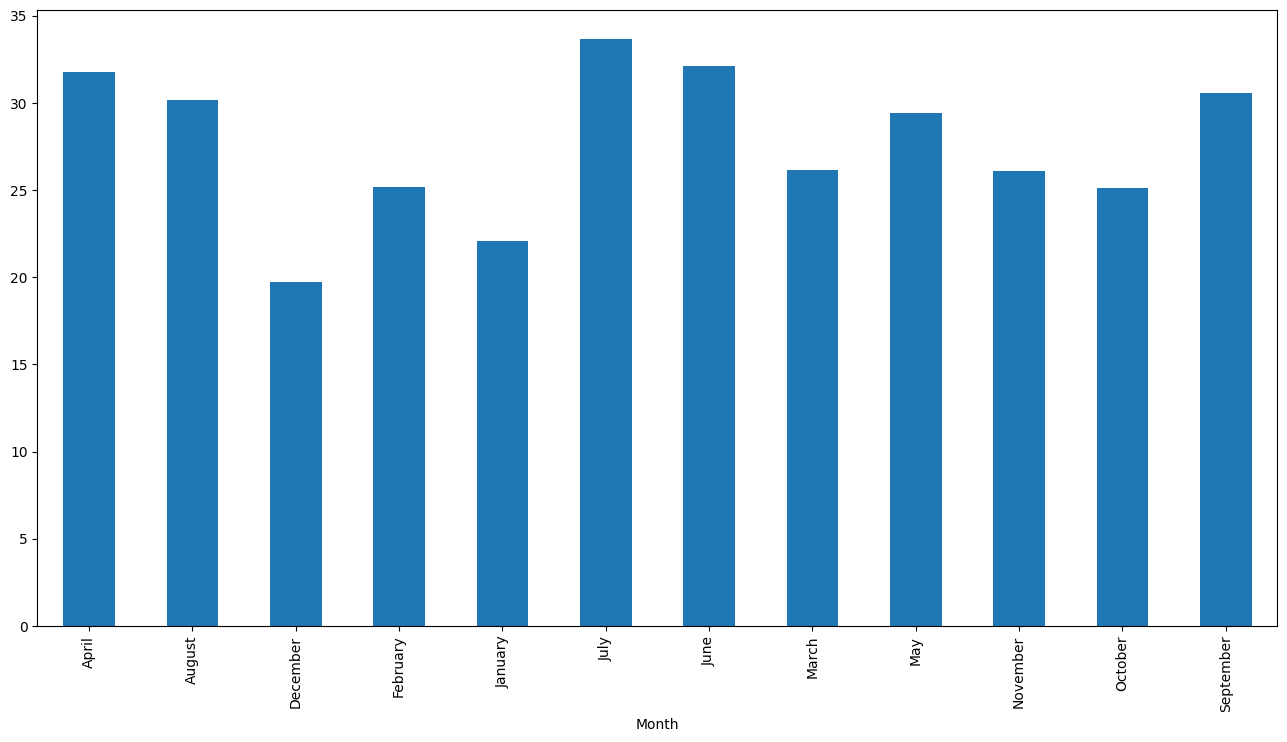

In [68]:
df.groupby('Month')['Visibility_km'].mean().plot.bar(figsize=(16,8))

### Insights: Mean Visibility highest in July lowest in December

<Axes: xlabel='Month'>

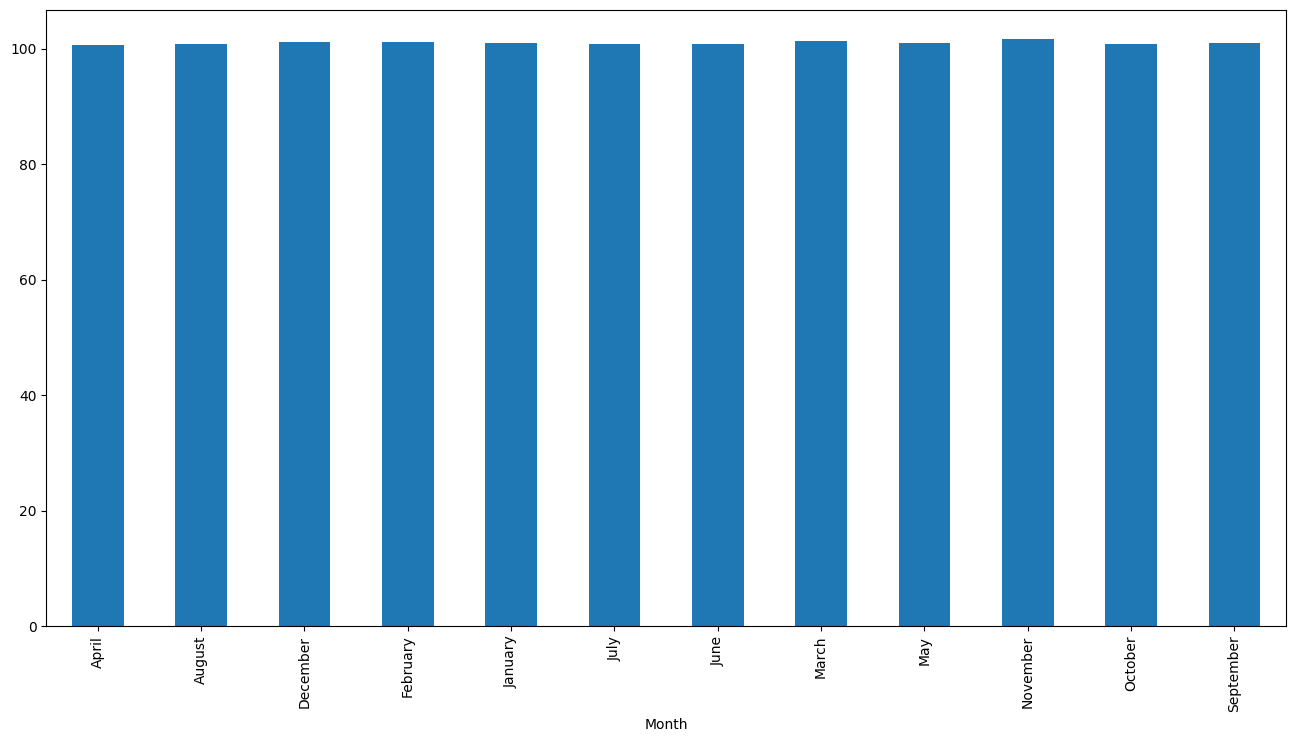

In [69]:
df.groupby('Month')['Press_kPa'].mean().plot.bar(figsize=(16,8))

### Insights: Mean Press_kPa almost consistent throughout months

qn 16

In [84]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]

In [99]:
mode_weather_yr = []
for month in months:
    common_weather = df[df['Month'] == month]['Weather Condition'].mode().values[0]
    mode_weather_yr.append(common_weather)

data = {
    'Month': months,
    'Weather Condition': mode_weather_yr
}
df_weather_byMonths = pd.DataFrame(data)
df_weather_byMonths

,Month,Weather Condition
0,January,Mostly Cloudy
1,February,Cloudy
2,March,Cloudy
3,April,Mostly Cloudy
4,May,Mostly Cloudy
5,June,Mostly Cloudy
6,July,Mainly Clear
7,August,Mainly Clear
8,September,Mainly Clear
9,October,Mostly Cloudy


qn 17

In [101]:
print(f"Most frequent weather pattern in the entire year is {df_weather_byMonths['Weather Condition'].mode().values[0]}")

Most frequent weather pattern in the entire year is Mostly Cloudy
